In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [112]:
df=pd.read_csv('/content/data_version_2.csv')
df.head()

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Purpose,Location,Age Possession,area,price_per_sqft,colony,province,society,property Type
0,0,48022756,Rawalpindi,NaN,5.0,6.0,1.0,2.0,0.0,7.50,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Relatively New,5445.0,13774.10,Bahria Town Phase 8,Punjab,Bahria Town Rawalpindi,Houses
1,1,51560745,Rawalpindi,NaN,5.0,6.0,1.0,2.0,0.0,3.75,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Relatively New,2968.0,12634.77,Bahria Town Phase 8,Punjab,Bahria Town Rawalpindi,Houses
2,2,51815448,Rawalpindi,NaN,5.0,6.0,1.0,2.0,0.0,4.25,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Undefined,2722.0,15613.52,Bahria Town Phase 4,Punjab,Bahria Town Rawalpindi,Houses
3,3,52061409,Rawalpindi,1.0,3.0,3.0,0.0,1.0,0.0,1.50,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Relatively New,1361.0,11021.31,Bahria Town Phase 8,Punjab,Bahria Town Rawalpindi,Houses
4,4,52010487,Rawalpindi,3.0,6.0,6.0,1.0,2.0,1.0,4.75,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",New Property,3812.0,12460.65,Bahria Greens,Punjab,Bahria Town Rawalpindi,Houses


In [113]:
df.duplicated().sum()

0

### property_type vs price

<Axes: xlabel='property Type', ylabel='price'>

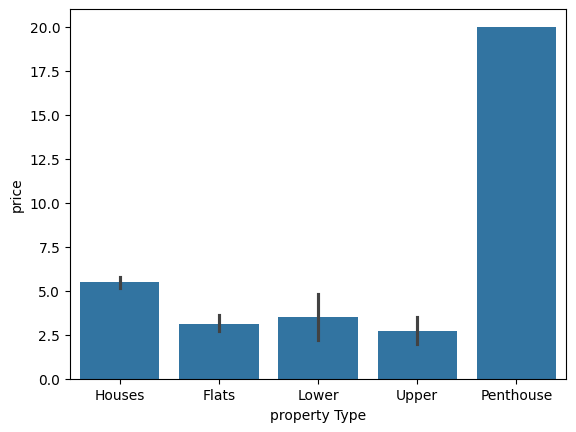

In [114]:
sns.barplot(data=df,x='property Type',y='price')

In [115]:
df['property Type'].value_counts()

,count
property Type,
Houses,1228
Flats,118
Upper,13
Lower,6
Penthouse,1


In [116]:
# Lower Property Type" generally refers to lower-priced or more affordable real estate properties
df[df['property Type']=='Lower']

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Purpose,Location,Age Possession,area,price_per_sqft,colony,province,society,property Type
1245,1245,52014292,Karachi,NaN,3.0,3.0,1.0,1.0,1.0,2.35,For Sale,"North Nazimabad, Karachi, Sindh,",Relatively New,2070.0,11352.66,North Nazimabad,Sindh,North Nazimabad,Lower
1264,1264,51924984,Karachi,NaN,4.0,4.0,0.0,1.0,1.0,5.00,For Sale,"Jamshed Town, Karachi, Sindh,",Undefined,2250.0,22222.22,PECHS Block 2,Sindh,Jamshed Town,Lower
1350,1350,52125579,Karachi,NaN,4.0,4.0,0.0,1.0,0.0,2.90,For Sale,"North Nazimabad, Karachi, Sindh,",Undefined,2160.0,13425.93,North Nazimabad,Sindh,North Nazimabad,Lower
1372,1372,51942728,Karachi,1.0,4.0,4.0,1.0,1.0,1.0,6.25,For Sale,"Jamshed Town, Karachi, Sindh,",Moderately Old,2502.0,24980.02,PECHS Block 2,Sindh,Jamshed Town,Lower
1422,1422,52006158,Karachi,NaN,0.0,0.0,0.0,0.0,0.0,1.15,For Sale,"Nazimabad, Karachi, Sindh,",Undefined,1080.0,10648.15,Nazimabad 2,Sindh,Nazimabad,Lower
1517,1517,50119841,Karachi,1.0,3.0,3.0,0.0,1.0,1.0,3.50,For Sale,"Jamshed Town, Karachi, Sindh,",Relatively New,1800.0,19444.44,PECHS Block 2,Sindh,Jamshed Town,Lower


In [117]:
df.columns

Index(['Unnamed: 0', 'House Number', 'City', 'Parking Spaces', 'Bedrooms',
       'Bathrooms', 'Servant Quarters', 'Kitchens', 'Store Rooms', 'price',
       'Purpose', 'Location', 'Age Possession', 'area', 'price_per_sqft',
       'colony', 'province', 'society', 'property Type'],
      dtype='object')

<Axes: xlabel='property Type', ylabel='price'>

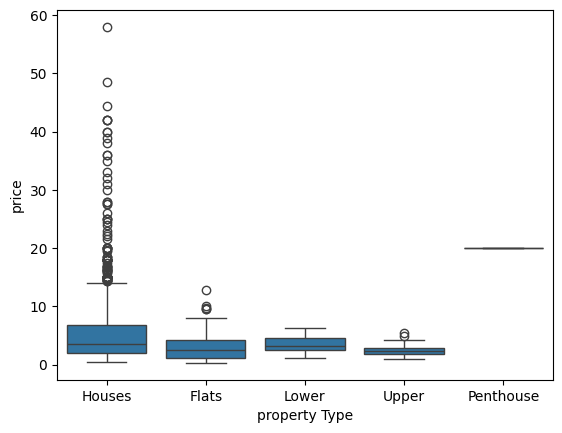

In [118]:
sns.boxplot(data=df,x='property Type',y='price')

## Assumption
- we have 5 type of property types like `'Houses', nan, 'Flats', 'Lower', 'Upper', 'Penthouse'`
`Houses`:
- totol House `1228` and price between 1 to 6 or 7 and house type have several error but 1 error crzy
- total flats `118` and price between 1 to 3 but some flat between 3 to 5 and have some error  
- Lower total values `13` and price between 1 t0 3 but some lower between 3 to 5
- upper total values `6` and price between 1 to 3  and some upper type 3 to 4 and have some error
- penthouse only one values but Here is huge price value `30` so it is outlier

### property_type vs price_per_sqft

<Axes: xlabel='property Type', ylabel='price_per_sqft'>

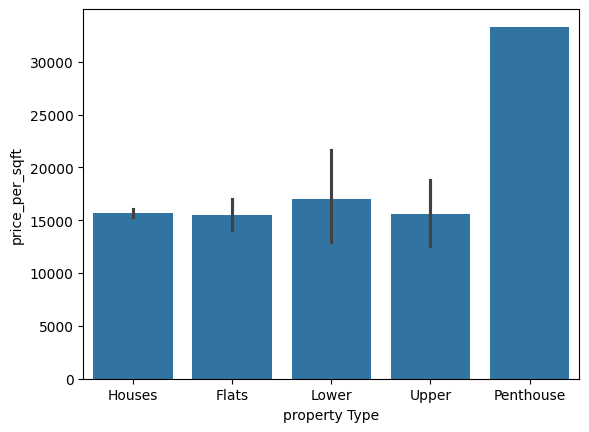

In [119]:
sns.barplot(data=df,x='property Type',y='price_per_sqft')

<Axes: xlabel='property Type', ylabel='price_per_sqft'>

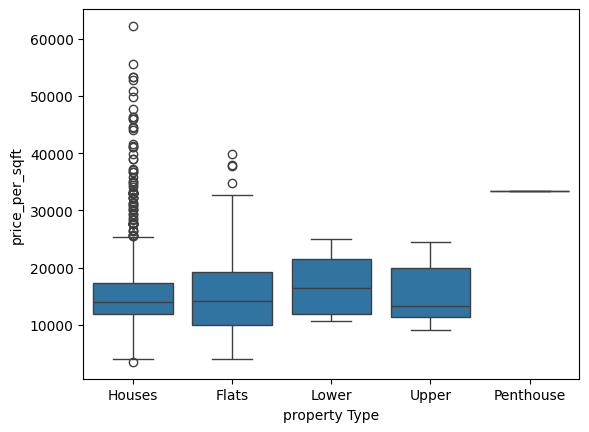

In [120]:
sns.boxplot(data=df,x='property Type',y='price_per_sqft')

### property type and bedrooms

<Axes: xlabel='Bedrooms', ylabel='property Type'>

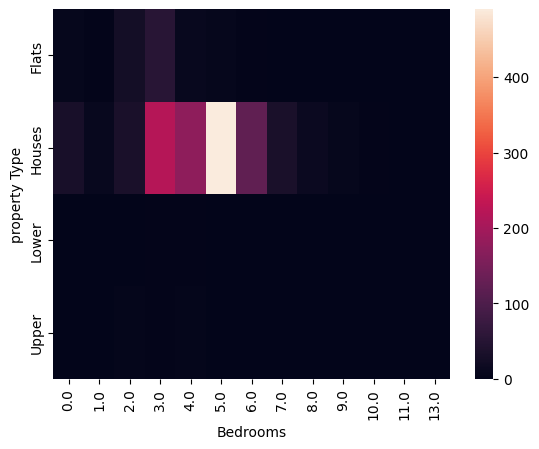

In [121]:
sns.heatmap(pd.crosstab(df['property Type'],df['Bedrooms']))

In [122]:
# checking outlier
df[df['Bedrooms']>=10]

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Purpose,Location,Age Possession,area,price_per_sqft,colony,province,society,property Type
641,641,51960624,Lahore,5.0,10.0,8.0,1.0,2.0,1.0,1.6,For Sale,"Central Park Housing Scheme, Lahore, Punjab,",Relatively New,1361.0,11756.06,Central Park,Punjab,Central Park Housing Scheme,Houses
863,863,50280209,Lahore,4.0,10.0,11.0,2.0,4.0,2.0,14.0,For Sale,"DHA Defence, Lahore, Punjab,",Relatively New,5445.0,25711.66,DHA Phase 5,Punjab,DHA Defence,Houses
1258,1258,52074321,Karachi,4.0,11.0,11.0,2.0,3.0,0.0,11.5,For Sale,Gulshan,Relatively New,2160.0,53240.74,Gulshan,Sindh,Gulshan,Houses
1375,1375,51725537,Karachi,6.0,13.0,13.0,1.0,4.0,4.0,8.6,For Sale,Gulistan,New Property,3600.0,23888.89,Sindh Baloch Housing Society,Sindh,Gulistan,Houses
1484,1484,51266256,Karachi,NaN,10.0,11.0,0.0,0.0,0.0,11.0,For Sale,Gulshan,Relatively New,2160.0,50925.93,Gulshan,Sindh,Gulshan,Houses


<Axes: xlabel='Bedrooms', ylabel='property Type'>

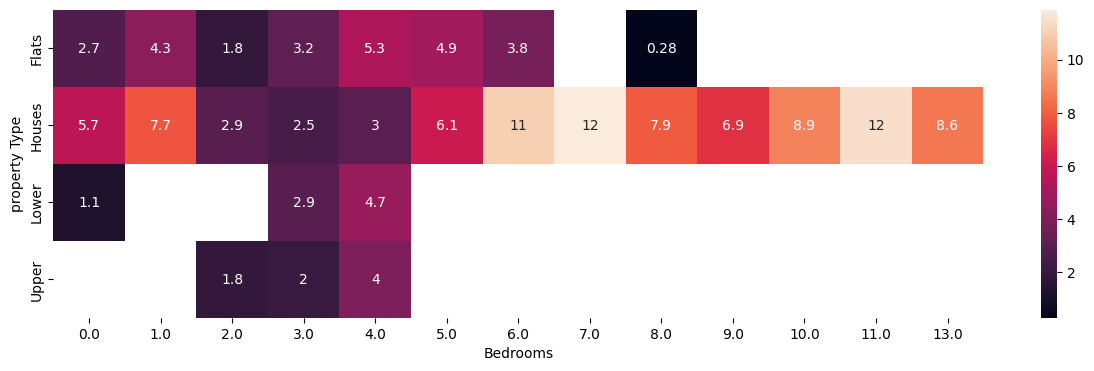

In [123]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df,index='property Type',columns='Bedrooms',values='price',aggfunc='mean'),annot=True)

In [124]:
df[df['price']==0.28]

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Purpose,Location,Age Possession,area,price_per_sqft,colony,province,society,property Type
1401,1401,52040838,Karachi,NaN,8.0,1.0,1.0,1.0,1.0,0.28,For Sale,"Bahria Town Karachi, Karachi, Sindh,",Undefined,279.0,10035.84,Bahria Town,Sindh,Bahria Town Karachi,Flats


### Assumption
- House type have some outlier in from of bedrooms columns estimate 5 outliers and one outlier have high price
- flat type have several outlier and one outlier have  price `28 Lak` and other outlier have price high

In [125]:
df.columns

Index(['Unnamed: 0', 'House Number', 'City', 'Parking Spaces', 'Bedrooms',
       'Bathrooms', 'Servant Quarters', 'Kitchens', 'Store Rooms', 'price',
       'Purpose', 'Location', 'Age Possession', 'area', 'price_per_sqft',
       'colony', 'province', 'society', 'property Type'],
      dtype='object')

### property type vs Age possession

<Axes: xlabel='Age Possession', ylabel='property Type'>

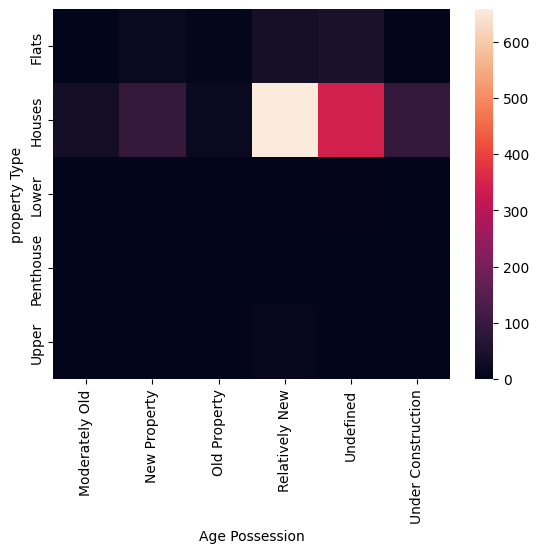

In [126]:
sns.heatmap(pd.crosstab(df['property Type'],df['Age Possession']))

<Axes: xlabel='Age Possession', ylabel='property Type'>

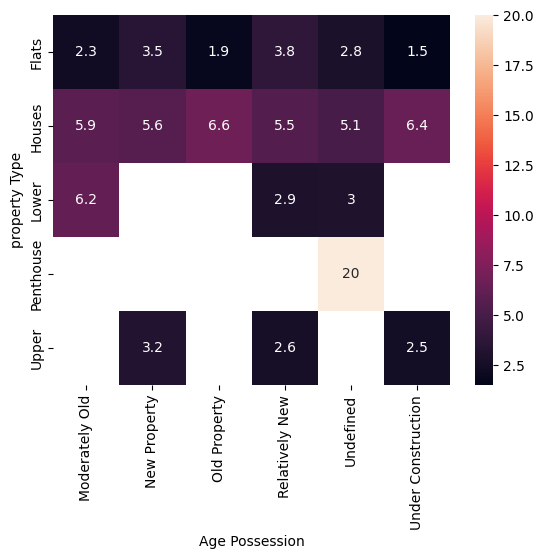

In [127]:
sns.heatmap(pd.pivot_table(df,index='property Type',columns='Age Possession',values='price',aggfunc='mean'),annot=True)

In [128]:
df[df['property Type']=='Penthouse']

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Purpose,Location,Age Possession,area,price_per_sqft,colony,province,society,property Type
1515,1515,52011503,Karachi,NaN,NaN,NaN,NaN,NaN,NaN,20.0,For Sale,"DHA Defence, Karachi, Sindh,",Undefined,6003.0,33316.67,Zamzama Commercial Area,Sindh,DHA Defence,Penthouse


### Assumpiton
- penthouses have only one outlier that price 20cr and age possession in not define
- lower type have some outlier and these outliers age possession `new property` ,`old property`
- upper type have some oulier and these outliers age possession `moderately old`,`old property`,`underfine`


### colony vs price

<Axes: xlabel='colony', ylabel='property Type'>

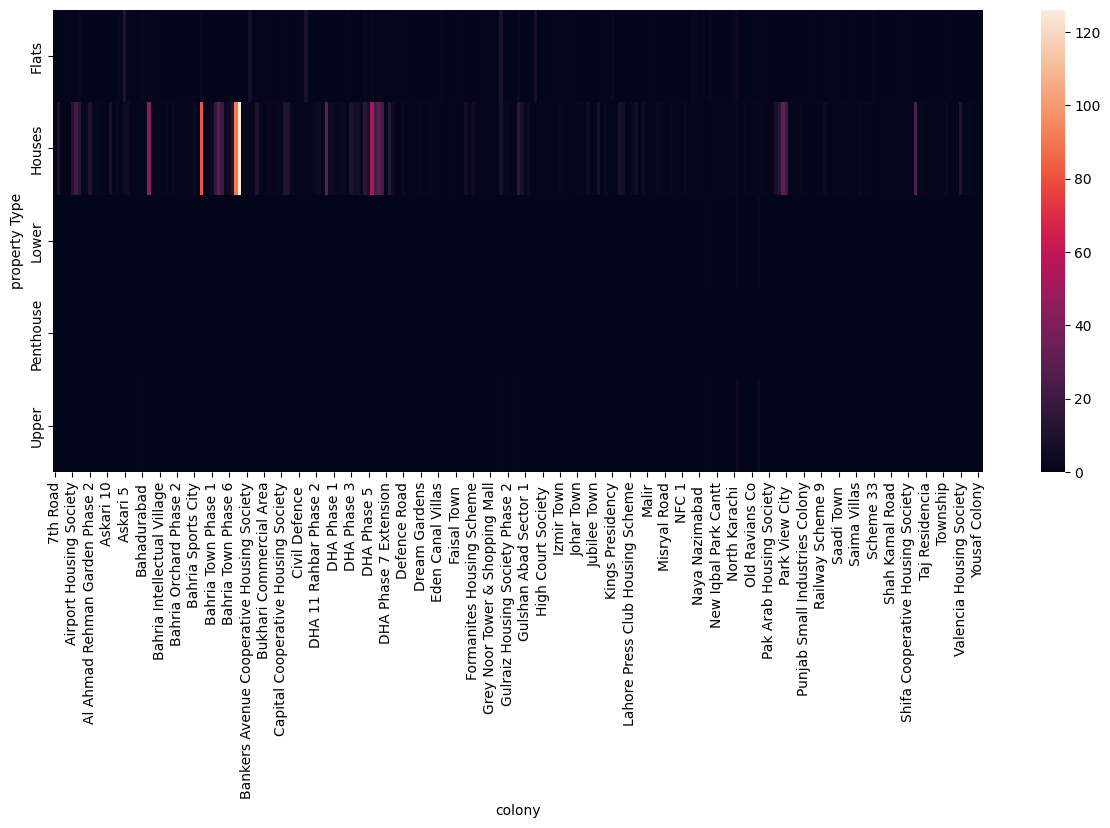

In [129]:
# colony analysis
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(df['property Type'],df['colony'].sort_index()))

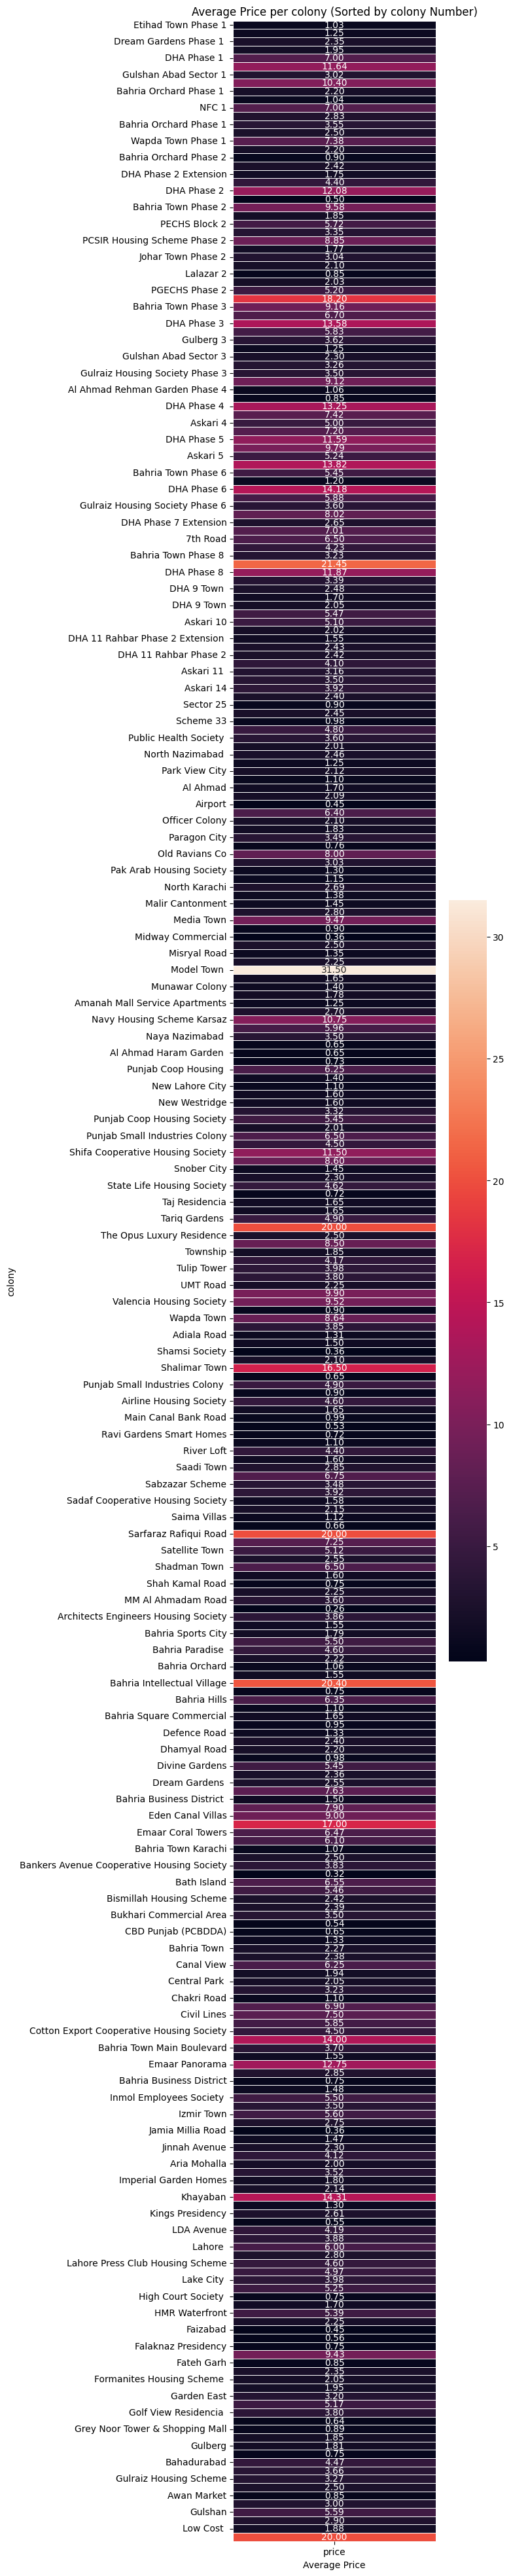

In [130]:
import re
# Group by 'colony' and calculate the average price
avg_price_per_colony = df.groupby('colony')['price'].mean().reset_index()

# Function to extract colony numbers
def extract_colony_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered colony

avg_price_per_colony['colony_number'] = avg_price_per_colony['colony'].apply(extract_colony_number)

# Sort by colony number
avg_price_per_colony_sorted_by_colony = avg_price_per_colony.sort_values(by='colony_number')

# Plot the heatmap
plt.figure(figsize=(5, 50))
sns.heatmap(avg_price_per_colony_sorted_by_colony.set_index('colony')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per colony (Sorted by colony Number)')
plt.xlabel('Average Price')
plt.ylabel('colony')
plt.show()

### avg price per sqft vs colony

In [131]:
df.columns

Index(['Unnamed: 0', 'House Number', 'City', 'Parking Spaces', 'Bedrooms',
       'Bathrooms', 'Servant Quarters', 'Kitchens', 'Store Rooms', 'price',
       'Purpose', 'Location', 'Age Possession', 'area', 'price_per_sqft',
       'colony', 'province', 'society', 'property Type'],
      dtype='object')

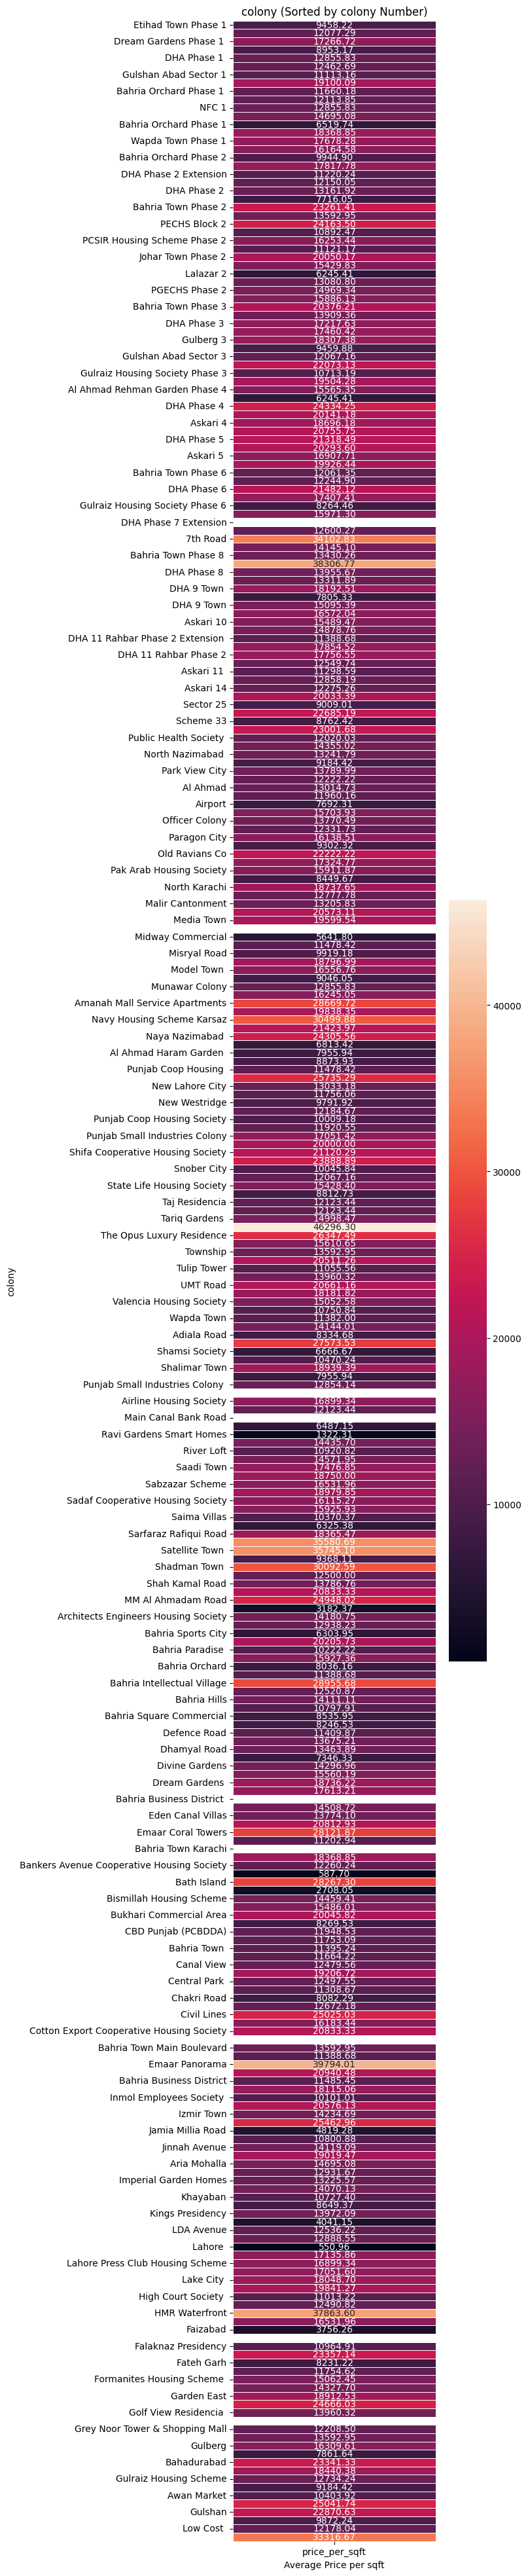

In [132]:
avg_price_per_sqft_colony = df.groupby('colony')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_colony['sector_number'] = avg_price_per_sqft_colony['colony'].apply(extract_colony_number)

# Sort by sector number
avg_price_per_sqft_colony_sorted_by_colony = avg_price_per_sqft_colony.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 50))
sns.heatmap(avg_price_per_sqft_colony_sorted_by_colony .set_index('colony')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('colony (Sorted by colony Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('colony')
plt.show()

### price

<Axes: xlabel='area', ylabel='price'>

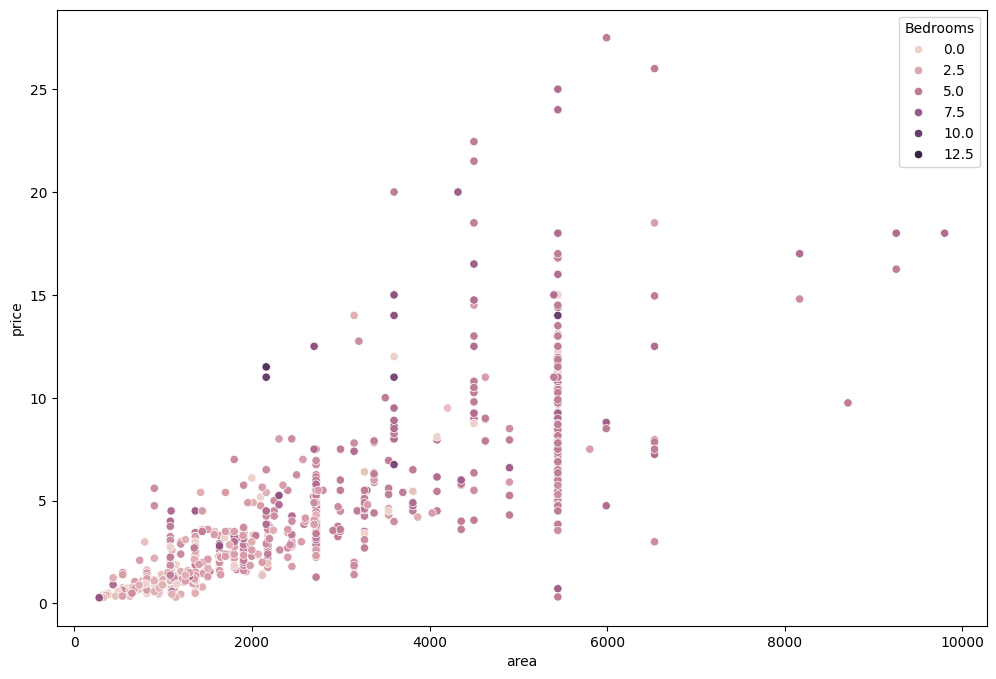

In [136]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x=df[df['area']<10000]['area'],y=df['price'],hue=df['Bedrooms'])

### Assumpiton
- price linear dependent with area

In [139]:
df.columns

Index(['Unnamed: 0', 'House Number', 'City', 'Parking Spaces', 'Bedrooms',
       'Bathrooms', 'Servant Quarters', 'Kitchens', 'Store Rooms', 'price',
       'Purpose', 'Location', 'Age Possession', 'area', 'price_per_sqft',
       'colony', 'province', 'society', 'property Type'],
      dtype='object')

<Axes: xlabel='area', ylabel='price'>

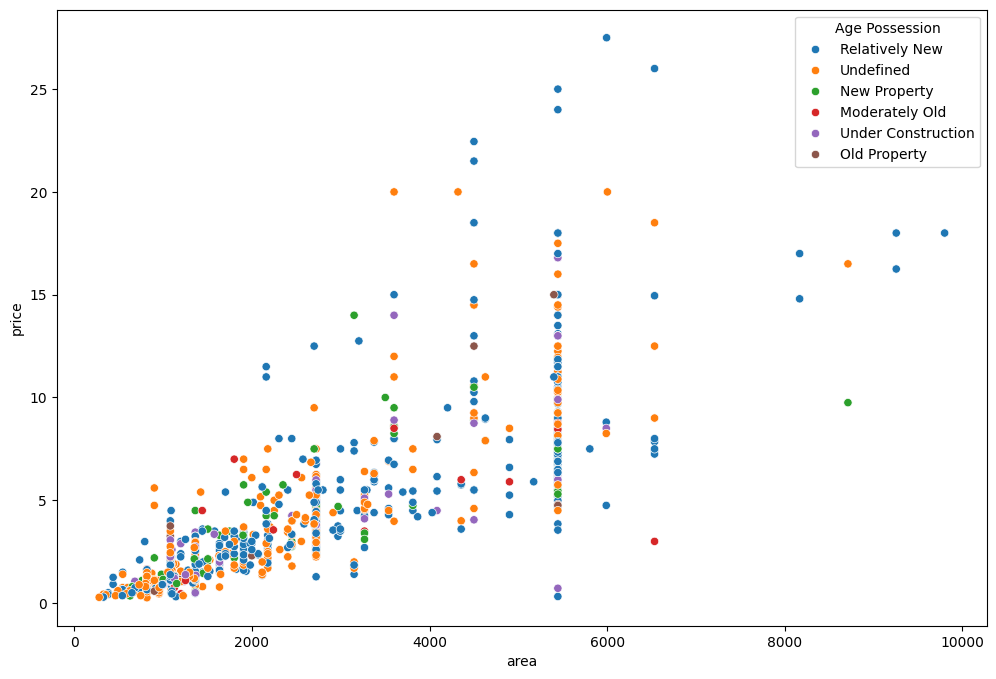

In [140]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x=df[df['area']<10000]['area'],y=df['price'],hue=df['Age Possession'])

### correlation

In [146]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [154]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Now calculate the correlation
correlation_matrix = numeric_df.corr()
correlation_matrix

,House Number,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,area,price_per_sqft
House Number,1.000000,0.025508,-0.039687,-0.033575,-0.054393,-0.004448,-0.050407,-0.038139,-0.019940,-0.024943
Parking Spaces,0.025508,1.000000,-0.007931,-0.022111,0.011080,0.017529,-0.012426,0.027821,0.016195,-0.019666
Bedrooms,-0.039687,-0.007931,1.000000,0.904053,0.340706,0.499556,0.298012,0.357292,0.282647,0.206151
Bathrooms,-0.033575,-0.022111,0.904053,1.000000,0.359174,0.512655,0.290835,0.357884,0.293681,0.190482
Servant Quarters,-0.054393,0.011080,0.340706,0.359174,1.000000,0.344589,0.506078,0.308538,0.272376,0.120877
Kitchens,-0.004448,0.017529,0.499556,0.512655,0.344589,1.000000,0.333906,0.155499,0.134687,0.065418
Store Rooms,-0.050407,-0.012426,0.298012,0.290835,0.506078,0.333906,1.000000,0.188981,0.153715,0.083583
price,-0.038139,0.027821,0.357292,0.357884,0.308538,0.155499,0.188981,1.000000,0.440584,0.608034
area,-0.019940,0.016195,0.282647,0.293681,0.272376,0.134687,0.153715,0.440584,1.000000,0.004127
price_per_sqft,-0.024943,-0.019666,0.206151,0.190482,0.120877,0.065418,0.083583,0.608034,0.004127,1.000000


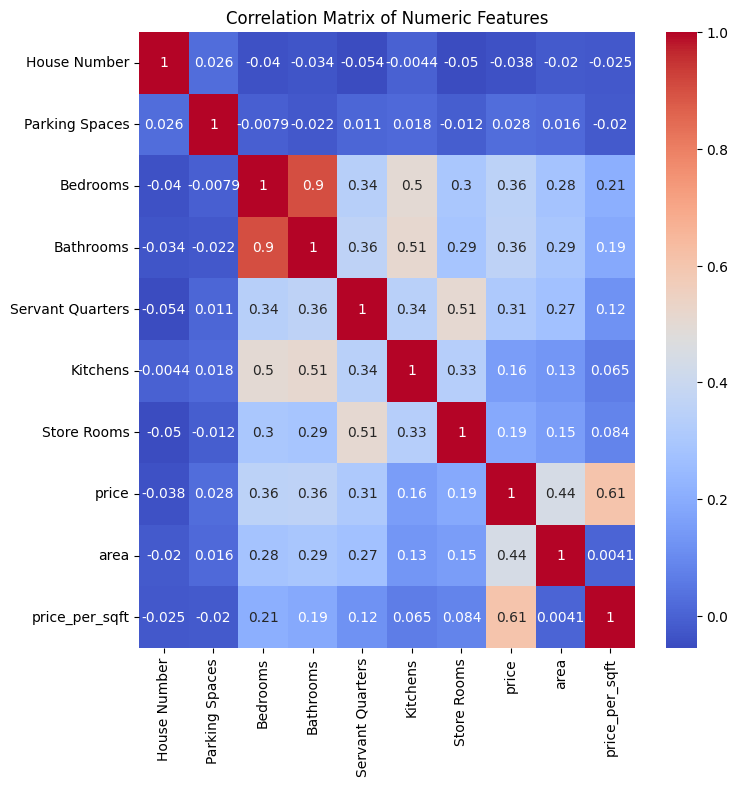

In [155]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [157]:
# check price depend which columns
correlation_matrix['price'].sort_values(ascending=False)

,price
price,1.000000
price_per_sqft,0.608034
area,0.440584
Bathrooms,0.357884
Bedrooms,0.357292
Servant Quarters,0.308538
Store Rooms,0.188981
Kitchens,0.155499
Parking Spaces,0.027821
House Number,-0.038139


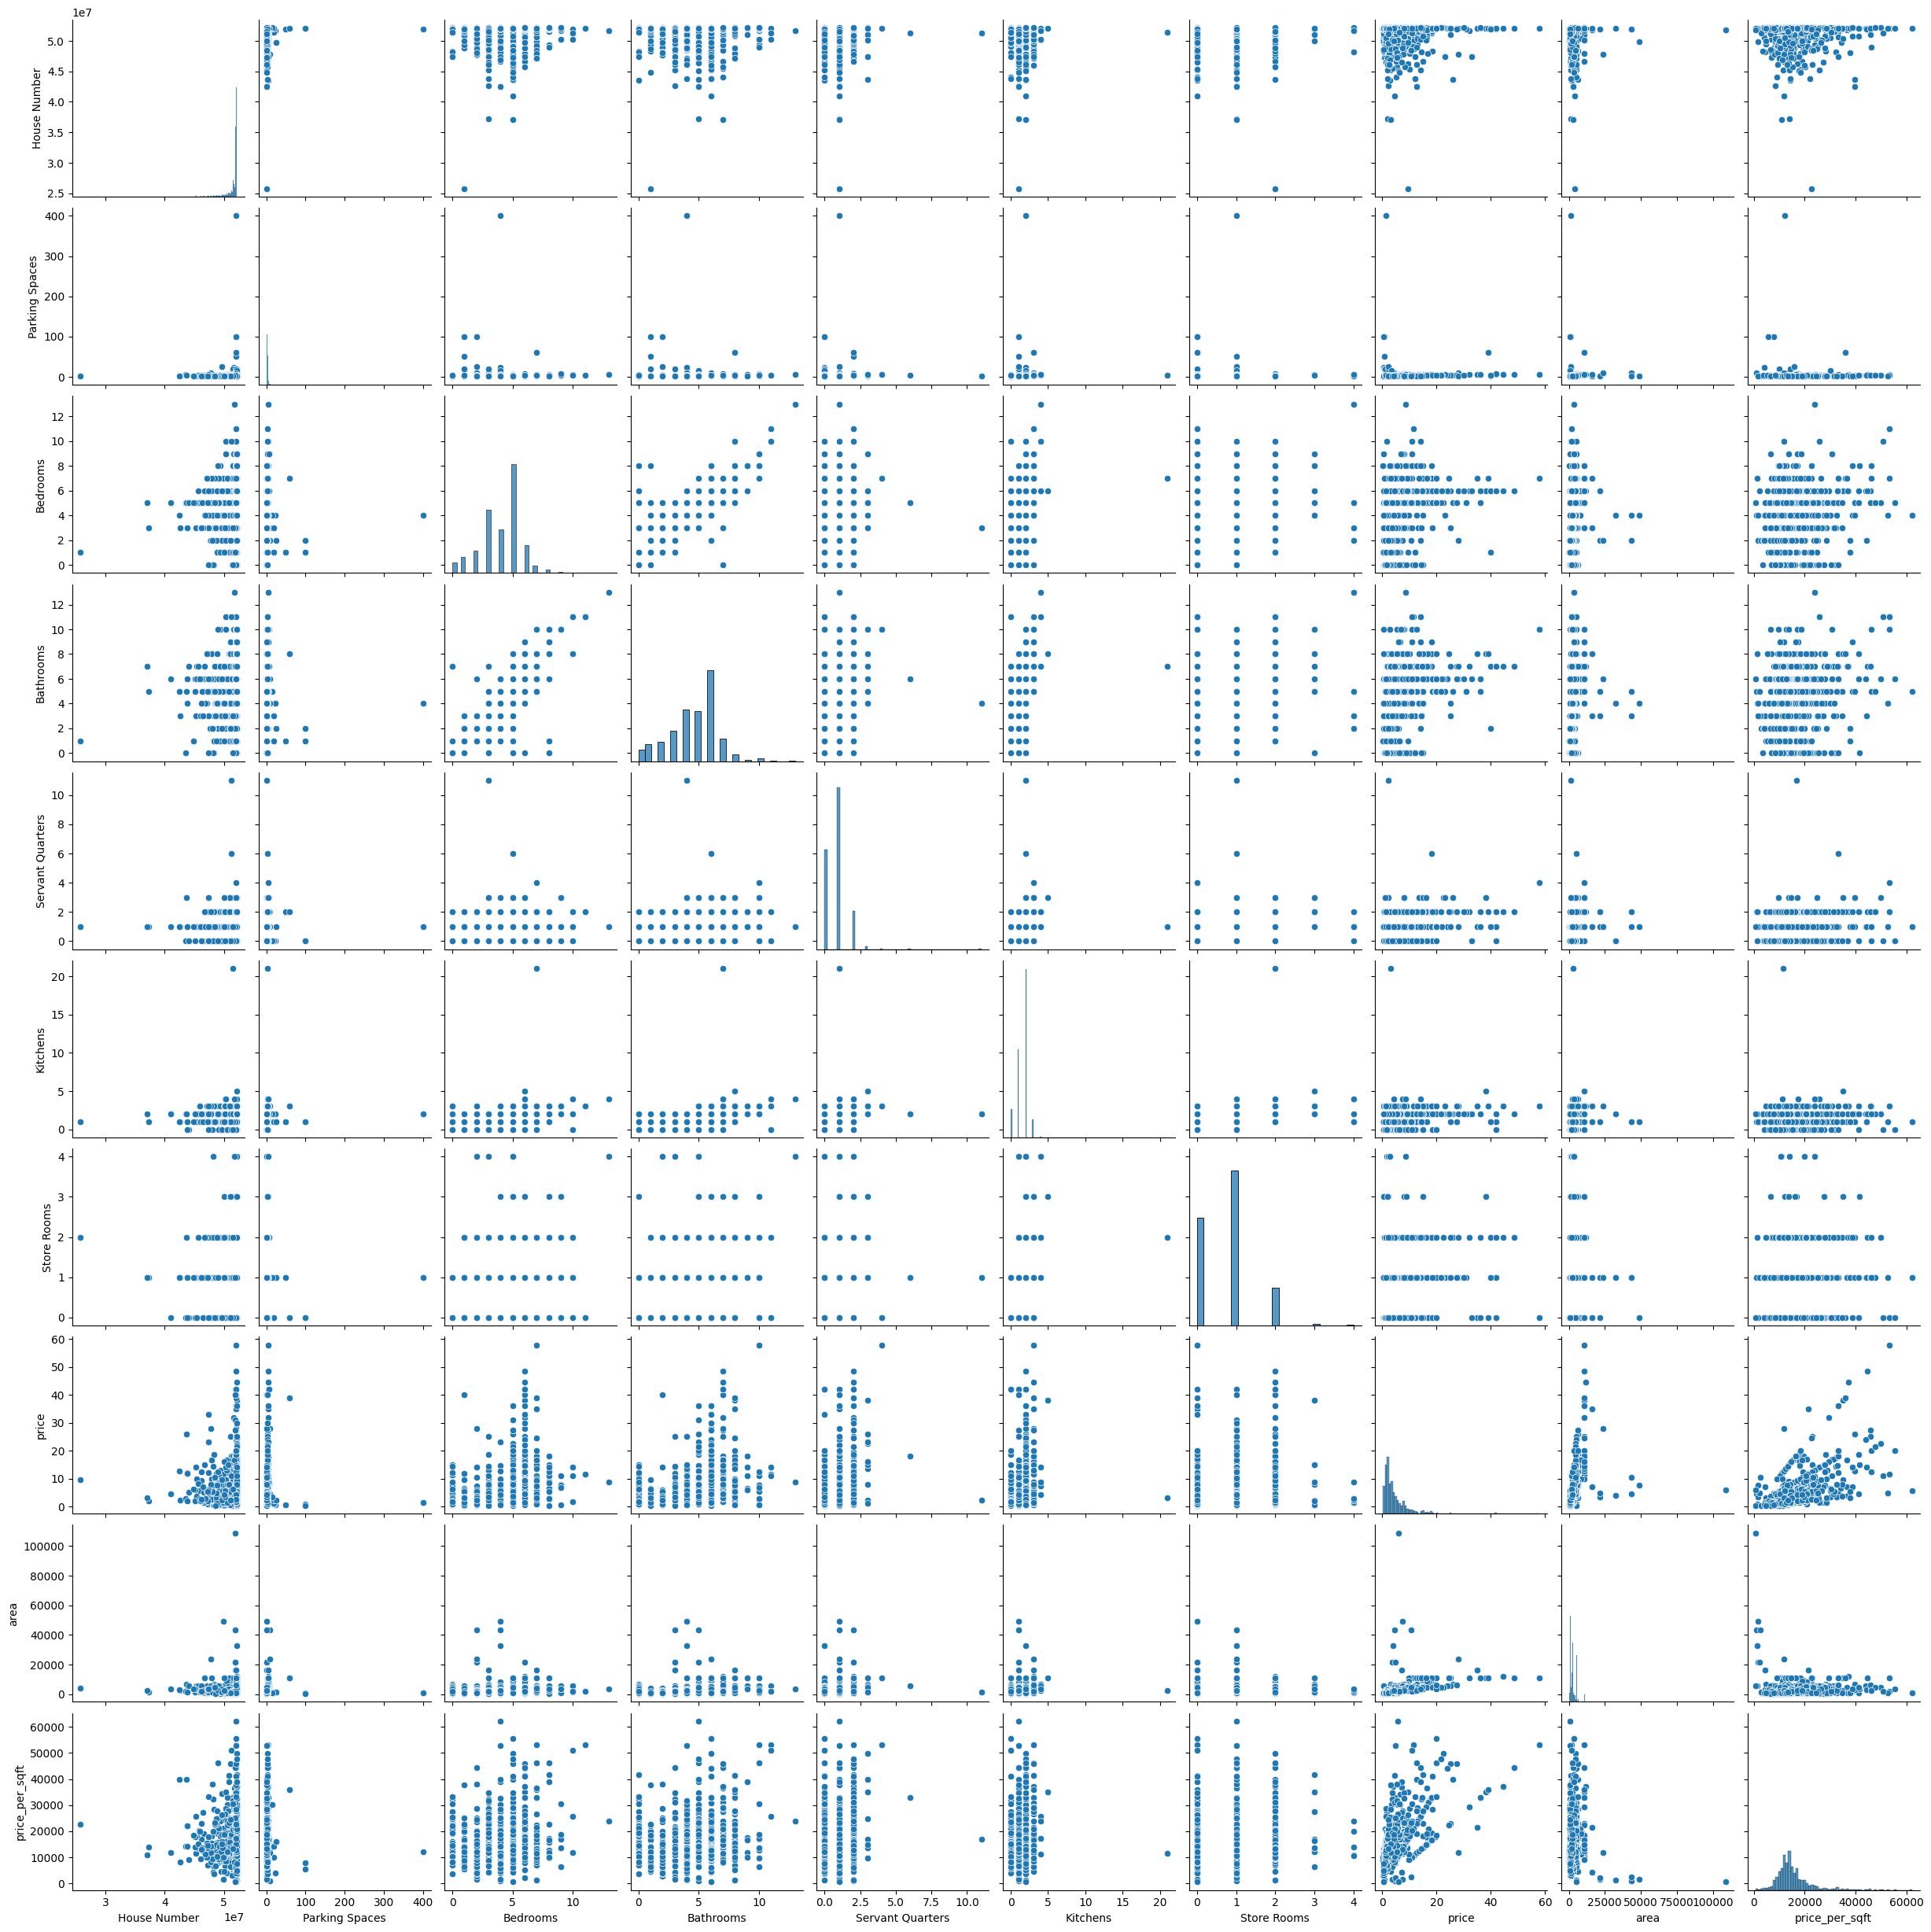

In [158]:
sns.pairplot(df)